# NLP Using NLTK

You may already have NLTK installed if you started out via Anaconda/Miniconda, if the import fails, just run `pip install nltk`.

Also if you arent using Anaconda make sure seaborn is install `pip install seaborn`

Also `pip install tweepy`

First, we need to download some sample data, luckily, nltk makes this super easy. This can be sluggish on a slower internet connection.

In [2]:
import nltk
import os

# Set the below if you'd like your NLTK files to go somewhere else,
# by default they're dropped into AppData/Roaming
download_directory = r'nltk-data'
nltk.data.path.append(download_directory)

nltk.download('twitter_samples', download_directory)
nltk.download('vader_lexicon', download_directory)

[nltk_data] Downloading package twitter_samples to nltk-data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package vader_lexicon to nltk-data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sentences = [
    "Larry is smart, handsome, and funny.", # positive sentence example
    "Larry is smart, handsome, and funny!", # punctuation emphasis handled correctly (sentiment intensity adjusted)
    "Larry is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
    "Larry is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
    "Larry is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
    "Larry is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!",# booster words & punctuation make this close to ceiling for score
    "The book was good.",         # positive sentence
    "The book was kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
    "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
    "A really bad, horrible book.",       # negative sentence with booster words
    "At least it isn't a horrible book.", # negated negative sentence with contraction
    ":) and :D",     # emoticons handled
    "",              # an empty string is correctly handled
    "Today sux",     #  negative slang handled
    "Today sux!",    #  negative slang with punctuation emphasis handled
    "Today SUX!",    #  negative slang with capitalization emphasis
    "Today kinda sux! But I'll get by, lol" # mixed sentiment example with slang and constrastive conjunction "but"
]

for sentence in sentences:
    print(sentence)
    
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    
    print()
    print('---')

Larry is smart, handsome, and funny.
compound: 0.8316, neg: 0.0, neu: 0.254, pos: 0.746, 
---
Larry is smart, handsome, and funny!
compound: 0.8439, neg: 0.0, neu: 0.248, pos: 0.752, 
---
Larry is very smart, handsome, and funny.
compound: 0.8545, neg: 0.0, neu: 0.299, pos: 0.701, 
---
Larry is VERY SMART, handsome, and FUNNY.
compound: 0.9227, neg: 0.0, neu: 0.246, pos: 0.754, 
---
Larry is VERY SMART, handsome, and FUNNY!!!
compound: 0.9342, neg: 0.0, neu: 0.233, pos: 0.767, 
---
Larry is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!
compound: 0.9469, neg: 0.0, neu: 0.294, pos: 0.706, 
---
The book was good.
compound: 0.4404, neg: 0.0, neu: 0.508, pos: 0.492, 
---
The book was kind of good.
compound: 0.3832, neg: 0.0, neu: 0.657, pos: 0.343, 
---
The plot was good, but the characters are uncompelling and the dialog is not great.
compound: -0.7042, neg: 0.327, neu: 0.579, pos: 0.094, 
---
A really bad, horrible book.
compound: -0.8211, neg: 0.791, neu: 0.209, pos: 0.0, 
---
At 

c:\dev\lse-ml\venv\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
custom_sentences = [
    'Apple is a great company',
    'Microsoft collapsed in 2007',
    'Microsoft collapsed horribly in 2007',
    'Apple is a great at being bad'
]

for sentence in custom_sentences:
    print(sentence)
    
    scores = sid.polarity_scores(sentence)
    for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')
    
    print()
    print('---')

Apple is a great company
compound: 0.6249, neg: 0.0, neu: 0.423, pos: 0.577, 
---
Microsoft collapsed in 2007
compound: -0.2732, neg: 0.412, neu: 0.588, pos: 0.0, 
---
Microsoft collapsed horribly in 2007
compound: -0.6705, neg: 0.647, neu: 0.353, pos: 0.0, 
---
Apple is a great at being bad
compound: 0.1531, neg: 0.302, neu: 0.345, pos: 0.353, 
---


In [5]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

print(len(positive_tweets))
print(len(negative_tweets))

scored_pos_tweets = [(sid.polarity_scores(tweet), tweet) for tweet in positive_tweets]
scored_neg_tweets = [(sid.polarity_scores(tweet), tweet) for tweet in negative_tweets]

5000
5000


c:\dev\lse-ml\venv\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


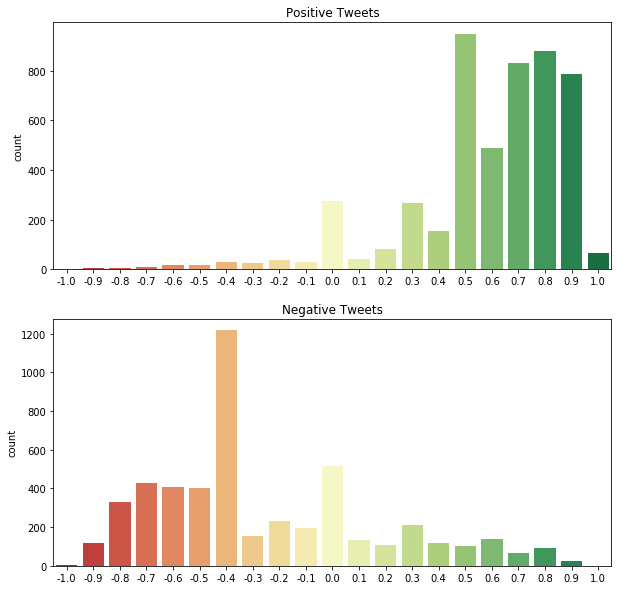

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pos_scores = [round(s['compound'], 1) for s, t in scored_pos_tweets]
neg_scores = [round(s['compound'], 1) for s, t in scored_neg_tweets]

fig, axs = plt.subplots(nrows=2, figsize=(10,10))

pos = sns.countplot(pos_scores, palette='RdYlGn', ax=axs[0])
neg = sns.countplot(neg_scores, palette='RdYlGn', ax=axs[1])
pos.set_title('Positive Tweets')
neg.set_title('Negative Tweets')

fig.show()

In [6]:
# Select some of the highest scoring positive tweets
sorted_pos_tweets = sorted(scored_pos_tweets, key=lambda x: x[0]['compound'], reverse=True)
for score, tweet in sorted_pos_tweets[:6]:
    print(tweet, end='\n\n')

print('-----------------------------')

sorted_neg_tweets = sorted(scored_neg_tweets, key=lambda x: x[0]['compound'])
# Manually filtered due to very strong language :-)
print(sorted_neg_tweets[1][1], end='\n\n')
print(sorted_neg_tweets[2][1], end='\n\n')
print(sorted_neg_tweets[7][1], end='\n\n')
print(sorted_neg_tweets[9][1], end='\n\n')

There :) is :) a :) pimple :) on :) my :) forehead :) the :) size :) of :) a :) volcano :)

A year ago I married my first love and my best friend.  Thanks for an amazing year Glenn!  I love being your wife! :) http://t.co/CbiP1LHLuc

Lol :D @akshaykumar i know it was your idea :p coz you have unforgettable sense of humor ;) :) :D love you bro :* https://t.co/qiyrhDK9eB

When the managers at your job tell you and your friend that you are the two prettiest girls there :) :) :) :) :) :) :)

@clmazin @johnaugust Norhing but the Dialogue was so helpful! More like this please! Love you guys :)

@IGNUK #1TBPS4 Wow! what a prize! so delightful for my eyes, pick me to win and I will burst and sing "PS4 is mine and I feel divine" :)

-----------------------------
:( :( :( when pay day doesn't make you any less poor :( :( :(

Nearly 50 dead and over 100 wounded reported in bomb attacks in #Iraq. In one week over 300 human beings killed :(  http://t.co/OsxLd1LLG5

being sad for no reason sucks bec

In [7]:
import tweepy
import json

with open(r'c:\dev\twitter.json') as f:
    creds = json.load(f)
    
# Change these to your keys from your twitter application
auth = tweepy.OAuthHandler(creds['consumer']['key'], creds['consumer']['secret'])
auth.set_access_token(creds['app']['key'], creds['app']['secret'])

api = tweepy.API(auth)

dt_tweets = []

pages = 80
for pnum in range(pages):
    dt_tweets.extend(api.user_timeline('realDonaldTrump', page=pnum))

num_of_tweets = len(dt_tweets)
print(num_of_tweets)
print(dt_tweets[0].text)

1600
“Statement from President Donald J. Trump on #GivingTuesday” https://t.co/NrfnmixAwR


In [8]:
from collections import defaultdict
split_by_source = defaultdict(list)

for tweet in dt_tweets:
    split_by_source[tweet.source].append(tweet)

k_to_delete = []
for k, v in split_by_source.items():
    num_tweets = len(v)
    print('%s: %s tweets' % (k, num_tweets))
    if num_tweets < (num_of_tweets * 0.025):
        k_to_delete.append(k)

for key in k_to_delete:
    del split_by_source[key]

Twitter for iPhone: 1421 tweets
Twitter for iPad: 19 tweets
Media Studio: 104 tweets
Twitter Web Client: 39 tweets
Twitter Ads: 17 tweets


Twitter for iPhone
Media Studio


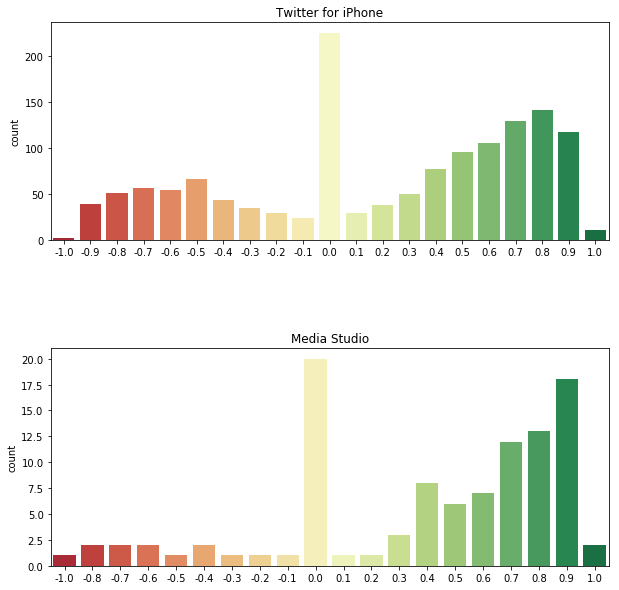

In [11]:
fig, axs = plt.subplots(nrows=len(split_by_source), figsize=(10,10))
fig.subplots_adjust(hspace=.5)
axes_count = 0

for key, tweets in split_by_source.items():
    print(key)
    scored_tweets = []
    for tweet in tweets:
        scored_tweets.append((sid.polarity_scores(tweet.text), tweet.text))
    
    scores = [round(s['compound'], 1) for s, t in scored_tweets]
    plot = sns.countplot(scores, palette='RdYlGn', ax=axs[axes_count])
    plot.set_title(key)
    axes_count += 1

In [42]:
print(dt_tweets[0].created_at.weekday())
data = {'weekday': [], 'compound': []}
data_by_hour = {'hour': [], 'compound': []}
for tweet in dt_tweets:
    data['weekday'].append(tweet.created_at.weekday())
    data['compound'].append(sid.polarity_scores(tweet.text)['compound'])
    data_by_hour['hour'].append(tweet.created_at.hour)
    data_by_hour['compound'].append(sid.polarity_scores(tweet.text)['compound'])
    

1


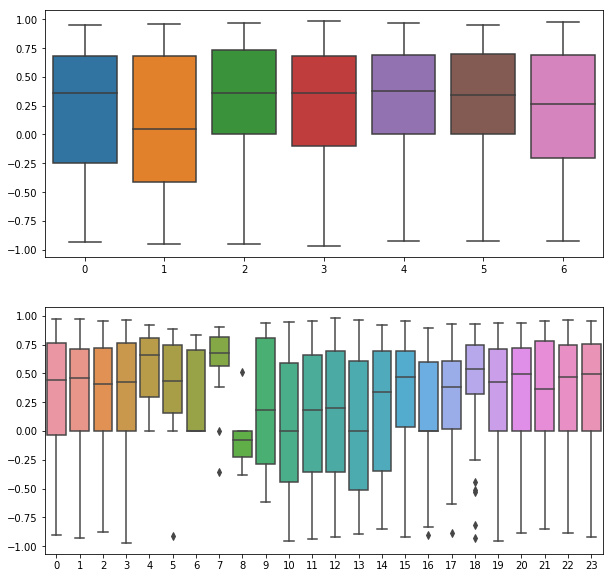

In [44]:
fig, axs = plt.subplots(nrows=2, figsize=(10,10))
sns.boxplot(x="weekday", y="compound", data=data, ax=axs[0])
sns.boxplot(x="hour", y="compound", data=data_by_hour, ax=axs[1])
